invoice_id: Es un identificador único para cada factura o transacción de venta en el supermercado.

branch: Representa la sucursal del supermercado donde se realizó la venta.

city: La ciudad donde se encuentra la sucursal del supermercado.

customer_type: El tipo de cliente, puede ser por ejemplo "Miembro" o "No miembro".

gender_customer: El género del cliente que realizó la compra.

product_line: La línea de productos o categoría a la que pertenece el artículo vendido.

unit_cost: El costo unitario de un artículo.

quantity: La cantidad de artículos comprados por el cliente.

5pct_markup: El porcentaje de marca aplicado al costo unitario para obtener el precio de venta.

revenue: Los ingresos generados por la venta de un artículo, calculados como el precio de venta multiplicado por la cantidad.

date: La fecha en que se realizó la venta.

time: La hora a la que se realizó la venta.

payment_method: El método de pago utilizado por el cliente.

cogs: El costo de bienes vendidos, es decir, el costo total de los artículos vendidos.

gm_pct: El porcentaje de margen bruto, calculado como (revenue - cogs) / revenue.

gross_income: El ingreso bruto, es decir, la ganancia total obtenida después de deducir el costo de los bienes vendidos (COGS).

rating: La calificación o valoración dada por el cliente sobre su experiencia de compra.



# Preguntas de análisis de Datos

1. ¿Cuál es la distribución de ventas por sucursal y ciudad?

Puedes analizar las ventas totales y el número de transacciones realizadas en cada sucursal y ciudad. Esto puede ayudarte a identificar las ubicaciones más rentables y las tendencias de compra en diferentes áreas.

2. ¿Cuál es el producto más vendido en cada sucursal?

Puedes determinar los productos más populares en cada sucursal analizando las cantidades vendidas de cada línea de producto.

3. ¿Hay una relación entre el género del cliente y el tipo de producto comprado?

Explora si existe alguna correlación entre el género del cliente y las líneas de productos que compran. Esto podría ayudarte a ajustar tu estrategia de marketing según el género de tus clientes.

4. ¿Cuál es el método de pago más utilizado y cuál genera más ingresos?

Examina los diferentes métodos de pago utilizados por los clientes y calcula los ingresos generados por cada método. Esto podría ayudarte a optimizar tus opciones de pago y promociones asociadas.

5. ¿Cuál es la relación entre la calificación del cliente y el monto gastado?

Investiga si existe alguna correlación entre la calificación dada por el cliente y el monto total gastado en una transacción. Esto podría proporcionar información sobre la satisfacción del cliente y su impacto en las ventas.

6. ¿Cuál es la tendencia de ingresos a lo largo del tiempo?

Analiza cómo han variado los ingresos a lo largo del tiempo. Puedes agrupar los datos por mes o trimestre para identificar patrones estacionales o tendencias a largo plazo en las ventas.

# **(Machine Learning) que puede ayudar a minimizar costos y aumentar el impacto económico**

1. Predicción de ventas futuras:

Es posible utilizar técnicas de regresión para predecir las ventas futuras del supermercado. Se pueden utilizar características como la ciudad, el tipo de cliente, el género del cliente, el tipo de producto, etc., como variables predictoras para entrenar el modelo de regresión.

2. Segmentación de clientes:

Se pueden utilizar algoritmos de clustering, como K-Means, para segmentar a los clientes en grupos basados en su comportamiento de compra. Las características como el tipo de producto preferido, la frecuencia de compra y el gasto promedio pueden ser utilizadas como características de entrada para el algoritmo de clustering.

3. Análisis de precios y márgenes:

Es posible realizar un análisis de precios y márgenes utilizando técnicas de regresión y análisis de correlación. Se puede explorar la relación entre el precio de los productos, los márgenes brutos y la satisfacción del cliente para identificar productos con precios óptimos que maximicen los ingresos.

4. Detección de patrones de compra:

Se pueden utilizar técnicas de minería de datos y análisis de secuencias para identificar patrones de compra comunes entre los clientes. Se pueden utilizar algoritmos como Apriori o FP-Growth para descubrir patrones de compra frecuentes y asociaciones entre diferentes productos.

5. Predicción de la calificación del cliente:

Es posible utilizar técnicas de clasificación para predecir la calificación que un cliente dará a su experiencia de compra. Se pueden utilizar características como el tipo de producto, la ciudad, el género, etc., como variables predictoras para entrenar el modelo de clasificación.

6. Optimización del inventario:

Se pueden utilizar técnicas de series temporales y modelos de demanda para predecir la demanda de productos y optimizar el inventario en función de las ventas históricas y las tendencias de compra. Se pueden utilizar algoritmos como ARIMA o modelos de aprendizaje profundo para predecir la demanda futura y optimizar los niveles de inventario.

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [273]:
df_supermarket_sales = pd.read_csv('supermarket_sales.csv')

In [274]:
df_supermarket_sales.head()

,invoice_id,branch,city,customer_type,gender_customer,product_line,unit_cost,quantity,5pct_markup,revenue,date,time,payment_method,cogs,gm_pct,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [275]:
df_supermarket_sales.shape

(1000, 17)

In [276]:
df_supermarket_sales.dtypes

invoice_id          object
branch              object
city                object
customer_type       object
gender_customer     object
product_line        object
unit_cost          float64
quantity             int64
5pct_markup        float64
revenue            float64
date                object
time                object
payment_method      object
cogs               float64
gm_pct             float64
gross_income       float64
rating             float64
dtype: object

In [277]:
df_supermarket_sales.isnull().sum()

invoice_id         0
branch             0
city               0
customer_type      0
gender_customer    0
product_line       0
unit_cost          0
quantity           0
5pct_markup        0
revenue            0
date               0
time               0
payment_method     0
cogs               0
gm_pct             0
gross_income       0
rating             0
dtype: int64

In [278]:
# cambiar columnas los nombres de las columnas
df_supermarket_sales.rename(columns={'5pct_markup': '5%_of_gross_income', 'revenue': 'Total'}, inplace=True)

In [279]:
df_supermarket_sales = df_supermarket_sales[['invoice_id', 'branch', 'city', 'customer_type', 'gender_customer',
       'product_line', 'unit_cost', 'quantity', 'cogs', '5%_of_gross_income', 'Total',
       'date', 'time', 'payment_method', 'gm_pct', 'gross_income',
       'rating']]

In [280]:
df_supermarket_sales = df_supermarket_sales.drop(['gm_pct', 'gross_income'], axis=1)

In [281]:
df_supermarket_sales.head()

,invoice_id,branch,city,customer_type,gender_customer,product_line,unit_cost,quantity,cogs,5%_of_gross_income,Total,date,time,payment_method,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83,26.1415,548.9715,01/05/19,13:08,Ewallet,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40,3.8200,80.2200,03/08/19,10:29,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31,16.2155,340.5255,03/03/19,13:23,Credit card,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76,23.2880,489.0480,1/27/2019,20:33,Ewallet,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17,30.2085,634.3785,02/08/19,10:37,Ewallet,5.3


In [282]:
df_supermarket_sales['date'] = pd.to_datetime(df_supermarket_sales['date'])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8072\163245405.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_supermarket_sales['date'] = pd.to_datetime(df_supermarket_sales['date'])


# 1. ¿Cuál es la distribución de ventas por sucursal y ciudad?



Se puede analizar las ventas totales y el número de transacciones realizadas en cada sucursal y ciudad. Esto puede ayudarte a identificar las ubicaciones más rentables y las tendencias de compra en diferentes áreas.

In [283]:
df_supermarket_sales[['branch', 'city', 'Total']].head()

,branch,city,Total
0,A,Yangon,548.9715
1,C,Naypyitaw,80.2200
2,A,Yangon,340.5255
3,A,Yangon,489.0480
4,A,Yangon,634.3785


In [284]:
df_branch_city = pd.DataFrame(df_supermarket_sales.groupby(['branch', 'city'])['Total'].sum().reindex()).reset_index()

In [285]:
df_branch_city

,branch,city,Total
0,A,Yangon,106200.3705
1,B,Mandalay,106197.6720
2,C,Naypyitaw,110568.7065


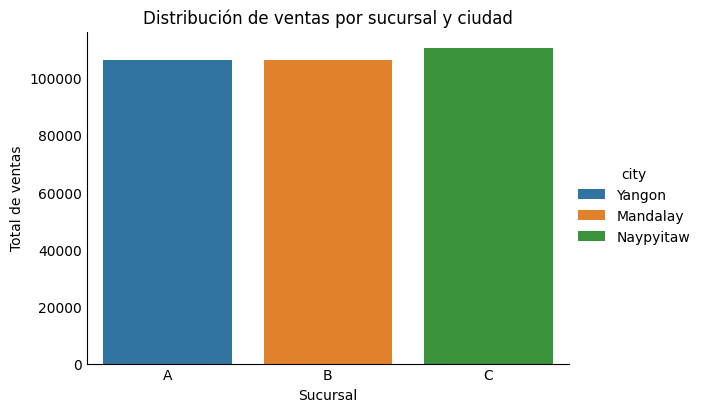

In [286]:
# Define the color palette
custom_palette = sns.color_palette('tab10', 3)  

# Create the bar plot with the specified color palette
sns.catplot(x='branch', y='Total', hue='city', kind='bar', data=df_branch_city, height=4, aspect=1.5, palette=custom_palette)
plt.title('Distribución de ventas por sucursal y ciudad')
plt.xlabel('Sucursal')
plt.ylabel('Total de ventas')
plt.show()

In [287]:
total_sales_city = df_branch_city.groupby('city')['Total'].sum()

## Promedio de ventas por cada sucursal

In [288]:
# para detallar mejor las ventas se verifica el promedio de ventas de cada sucursal
pd.DataFrame(df_supermarket_sales.groupby(['branch', 'city'])['Total'].mean().reindex())

,,Total
branch,city,
A,Yangon,312.354031
B,Mandalay,319.872506
C,Naypyitaw,337.099715


# 2. ¿Cuál es el producto más vendido en cada sucursal?

In [289]:
df_supermarket_sales[['branch', 'product_line', 'Total']].head()

,branch,product_line,Total
0,A,Health and beauty,548.9715
1,C,Electronic accessories,80.2200
2,A,Home and lifestyle,340.5255
3,A,Health and beauty,489.0480
4,A,Sports and travel,634.3785


In [290]:
# agrupagos por sucursal, productos y el total de ventas obtenidas de esos productos para cada sucursal en porcentaje de ventas
df_branch_product = df_supermarket_sales.groupby(['branch', 'product_line'])['Total'].sum() / df_supermarket_sales.groupby(['branch'])['Total'].sum() * 100

In [291]:
df_branch_product = df_branch_product.round(2)
df_branch_product

branch  product_line          
A       Electronic accessories    17.25
        Fashion accessories       15.38
        Food and beverages        16.16
        Health and beauty         11.86
        Home and lifestyle        21.11
        Sports and travel         18.24
B       Electronic accessories    16.06
        Fashion accessories       15.46
        Food and beverages        14.33
        Health and beauty         18.81
        Home and lifestyle        16.52
        Sports and travel         18.82
C       Electronic accessories    17.16
        Fashion accessories       19.50
        Food and beverages        21.50
        Health and beauty         15.03
        Home and lifestyle        12.57
        Sports and travel         14.26
Name: Total, dtype: float64

In [292]:
# Obtenemos el índice del máximo valor de Total para cada sucursal
indices_maximos = df_branch_product.groupby('branch').idxmax()

# Creamos un DataFrame con los productos más vendidos por sucursal
productos_mas_vendidos = (pd.DataFrame(df_branch_product.loc[indices_maximos]).reindex()).reset_index()

In [293]:
productos_mas_vendidos

,branch,product_line,Total
0,A,Home and lifestyle,21.11
1,B,Sports and travel,18.82
2,C,Food and beverages,21.50


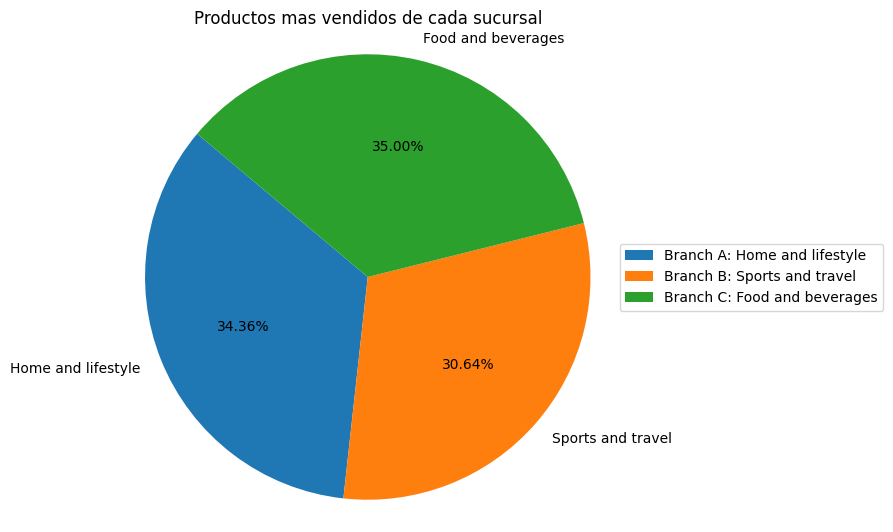

In [294]:
# Datos para el gráfico circular
labels = ['Home and lifestyle', 'Sports and travel', 'Food and beverages']
sizes = [21.11, 18.82, 21.50]
colors = sns.color_palette('tab10', 3)
branches = ['Branch A', 'Branch B', 'Branch C']

# Crear el gráfico circular
plt.figure(figsize=(5, 5))  # Ajustar el tamaño del gráfico
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
plt.axis('equal')  # Asegurar que el gráfico sea un círculo

# Añadir la leyenda a la derecha
plt.legend(labels=[f'{branch}: {label}' for branch, label in zip(branches, labels)], loc='center left', bbox_to_anchor=(1, 0.5))

# Añadir un título
plt.title('Productos mas vendidos de cada sucursal')

# Mostrar el gráfico
plt.show()

In [295]:
# agrupagos por sucursal, productos y el total de ventas obtenidas de esos productos para cada sucursal
df_branch_product = df_supermarket_sales.groupby(['branch', 'product_line'])['Total'].sum()

# Obtenemos el índice del máximo valor de Total para cada sucursal
indices_maximos = df_branch_product.groupby('branch').idxmax()

# Creamos un DataFrame con los productos más vendidos por sucursal
productos_mas_vendidos = (pd.DataFrame(df_branch_product.loc[indices_maximos]).reindex()).reset_index()

In [296]:
productos_mas_vendidos 

,branch,product_line,Total
0,A,Home and lifestyle,22417.1955
1,B,Sports and travel,19988.1990
2,C,Food and beverages,23766.8550


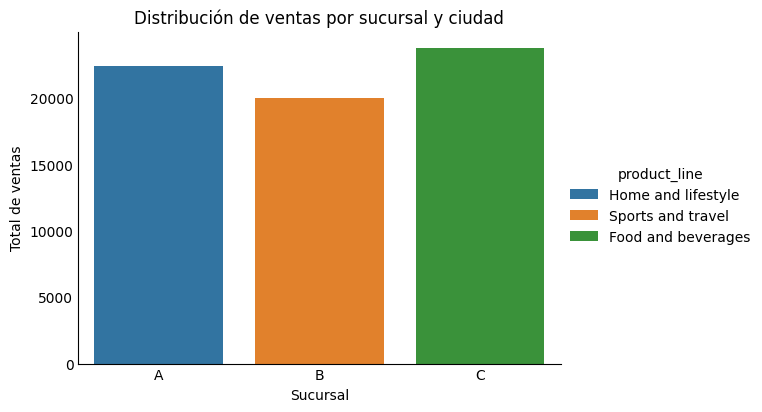

In [297]:
custom_palette = sns.color_palette('tab10', 3)  

sns.catplot(data=productos_mas_vendidos, x='branch', y='Total', hue='product_line', kind='bar', height=4, aspect=1.5, palette=custom_palette)
plt.title('Distribución de ventas por sucursal y ciudad')
plt.xlabel('Sucursal')
plt.ylabel('Total de ventas')

plt.show()

# 3. ¿Hay una relación entre el género del cliente y el tipo de producto comprado?

In [298]:
df_supermarket_sales[['gender_customer',  'product_line']].head()

,gender_customer,product_line
0,Female,Health and beauty
1,Female,Electronic accessories
2,Male,Home and lifestyle
3,Male,Health and beauty
4,Male,Sports and travel


In [299]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia para las dos variables
tabla_contingencia = pd.crosstab(df_supermarket_sales['gender_customer'], df_supermarket_sales['product_line'])

# Realizar la prueba de chi-cuadrado
chi2, p_valor, grados_libertad, _ = chi2_contingency(tabla_contingencia)

# Imprimir los resultados
print("Estadística de chi-cuadrado:", chi2)
print("Valor p:", p_valor)
print("Grados de libertad:", grados_libertad)

Estadística de chi-cuadrado: 5.7444558595826445
Valor p: 0.33188385805539095
Grados de libertad: 5


Dado que el valor p (0.3319) es mayor que un nivel de significancia comúnmente elegido como 0.05, no hay suficiente evidencia para rechazar la hipótesis nula de que no hay relación entre el género del cliente y el tipo de producto comprado. Esto significa que no hay una asociación significativa entre el género del cliente y el tipo de producto comprado en la población representada por los datos.

En resumen, según los resultados de la prueba de chi-cuadrado, no se puede concluir que haya una relación significativa entre el género del cliente y el tipo de producto comprado en el conjunto de datos analizado.

In [300]:
# Se calcula la frecuencia de cada combinación de género del cliente y tipo de producto
frecuencia_combinacion = df_supermarket_sales.groupby(['gender_customer', 'product_line']).size().unstack()
frecuencia_combinacion

product_line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
gender_customer,,,,,,
Female,84,96,90,64,79,88
Male,86,82,84,88,81,78


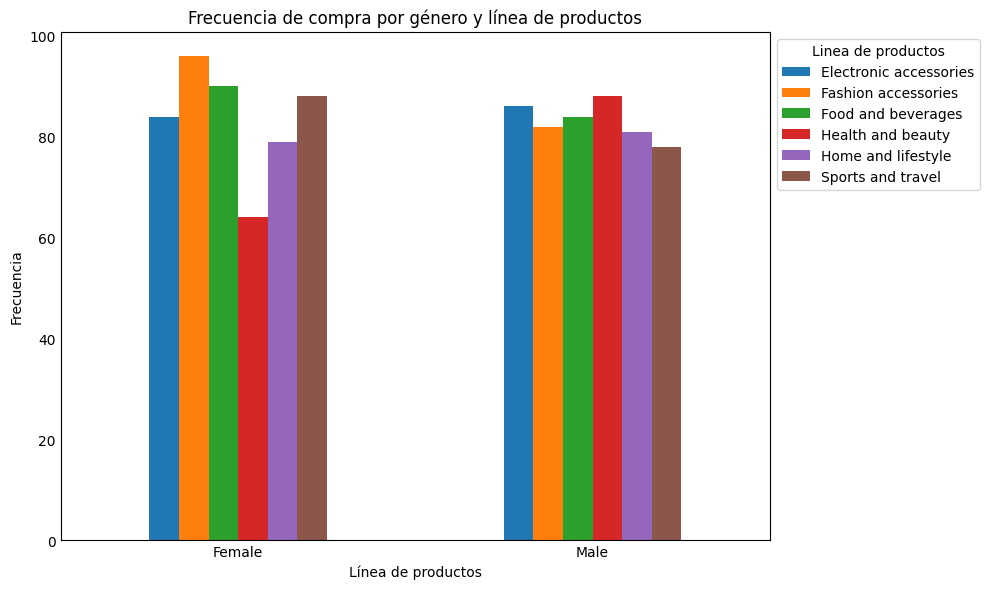

In [301]:
# Graficar
frecuencia_combinacion.plot(kind='bar', figsize=(10, 6), color = sns.color_palette('tab10'))
plt.title('Frecuencia de compra por género y línea de productos')
plt.xlabel('Línea de productos')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.legend(title='Género del cliente')

plt.legend(title='Linea de productos', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

Se observa la diferencia marcada entre las mujeres y los hombres a la ahora de comprar, si bien las mujeres prefieren comprar productos especificos como acecesorios electrodomesticos, accesorios de belleza, comida y viveres, deporte y vijes. Los hombres compran mas diversificado de manera proporcional

# 4. ¿Cuál es el método de pago más utilizado y cuál genera más ingresos?

In [302]:
df_payment_method = pd.DataFrame(df_supermarket_sales.groupby('payment_method')['5%_of_gross_income'].sum()).reset_index()
df_payment_method

,payment_method,5%_of_gross_income
0,Cash,5343.170
1,Credit card,4798.432
2,Ewallet,5237.767


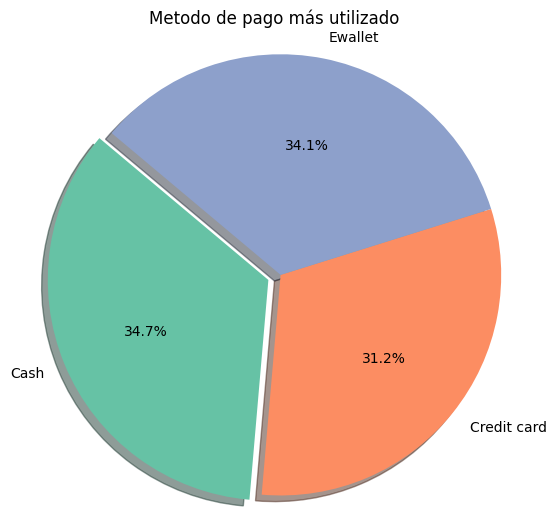

In [303]:
# Datos para el gráfico de pie
labels = df_payment_method['payment_method']
sizes = df_payment_method['5%_of_gross_income']
colors = sns.color_palette("Set2", 3)
explode = (0.06, 0, 0)  # "Explota" la porción de efectivo (Cash)

# Crear el gráfico de pie
plt.figure(figsize=(5, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Asegura que el gráfico de pie sea circular
plt.axis('equal')

# Título del gráfico
plt.title('Metodo de pago más utilizado')

# Mostrar el gráfico
plt.show()

Es interesante ver que el mayor flujo de caja es el efectivo es decir que los clientes prefieren pagar mas en efectivo 

# 5. ¿Cuál es la relación entre la calificación del cliente y el monto gastado?

In [304]:
df_supermarket_sales[['rating', 'Total']].head()

,rating,Total
0,9.1,548.9715
1,9.6,80.2200
2,7.4,340.5255
3,8.4,489.0480
4,5.3,634.3785


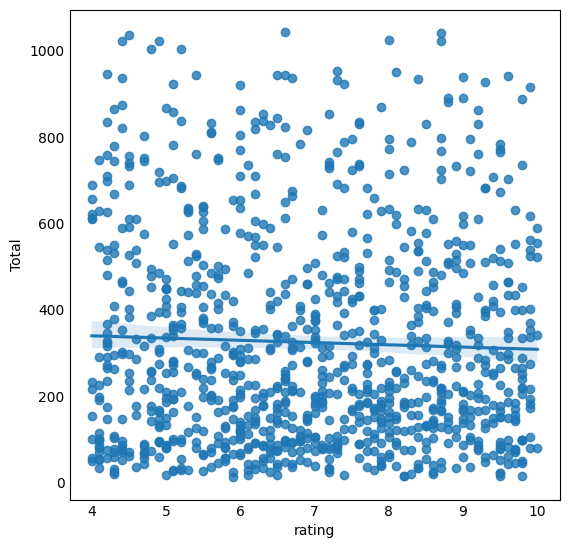

In [305]:
plt.figure(figsize=(5, 5))
sns.regplot(data=df_supermarket_sales, x='rating', y='Total');

<Axes: >

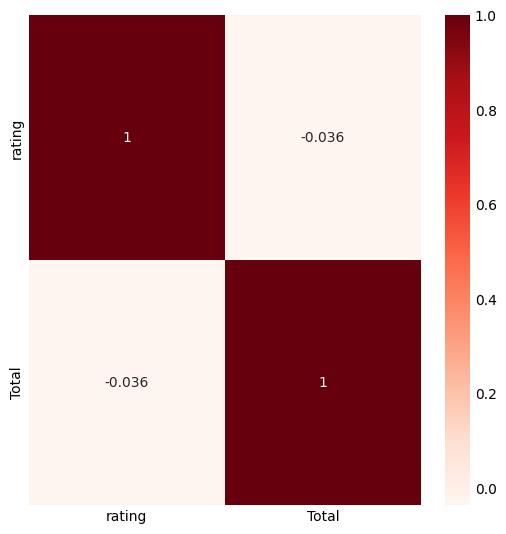

In [306]:
plt.figure(figsize=(5, 5))
m = df_supermarket_sales[['rating', 'Total']].corr()
sns.heatmap(m, annot=True, cmap='Reds')

In [307]:
# Calcular el monto total gastado por calificación del cliente
rating_total_spent = df_supermarket_sales.groupby('rating')['Total'].sum().reset_index()

In [308]:
rating_total_spent

,rating,Total
0,4.0,3986.5140
1,4.1,3589.1835
2,4.2,9275.9100
3,4.3,5958.1095
4,4.4,6716.5665
...,...,...
56,9.6,5592.2580
57,9.7,3332.3955
58,9.8,4976.9265
59,9.9,5822.9325


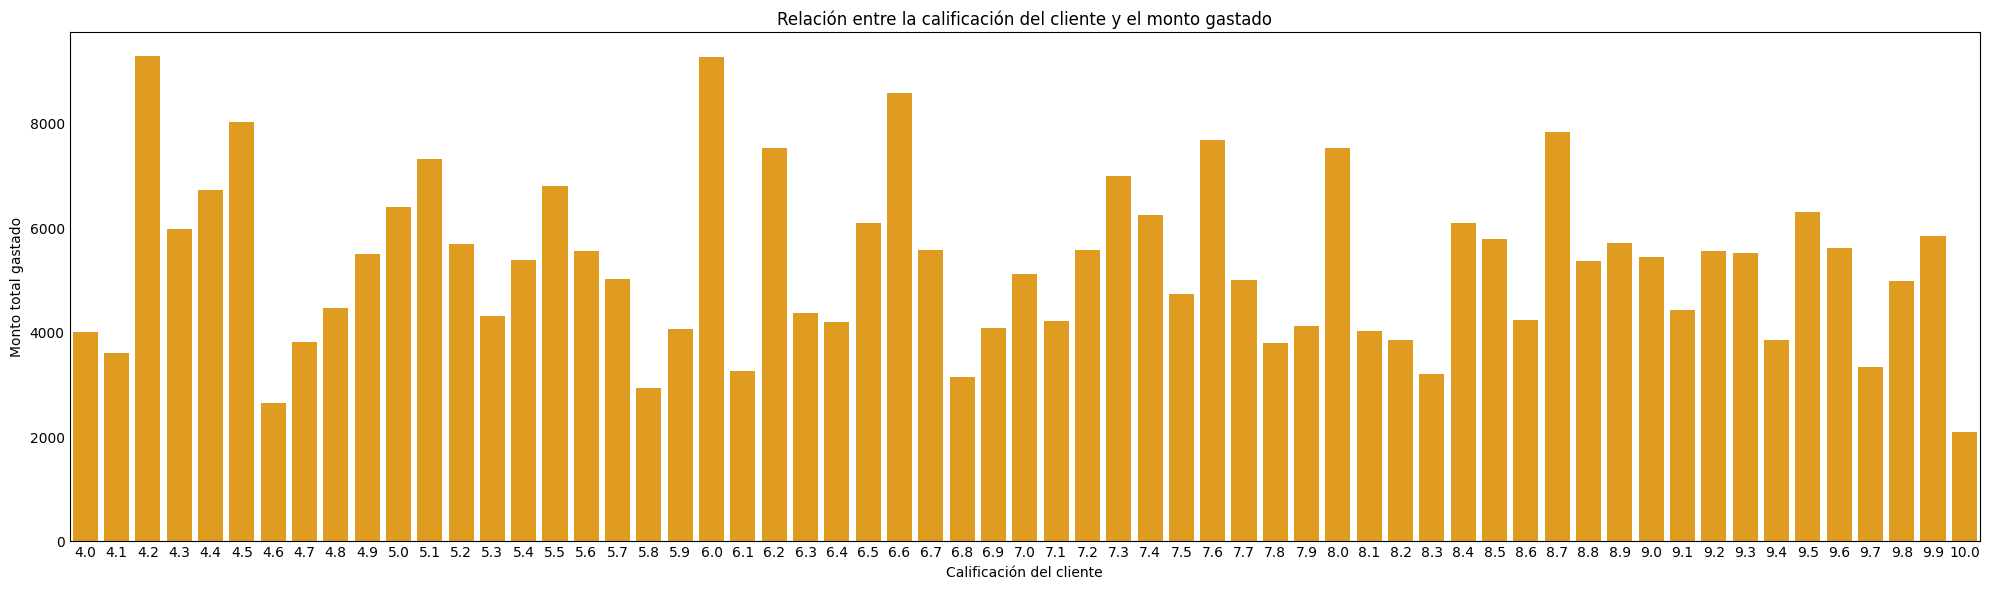

In [309]:
# Crear el gráfico de barras
plt.figure(figsize=(20, 6))
sns.barplot(data=rating_total_spent, x='rating', y='Total', color= 'orange')
plt.title('Relación entre la calificación del cliente y el monto gastado')
plt.xlabel('Calificación del cliente')
plt.ylabel('Monto total gastado')
plt.tight_layout()
plt.show()


In [310]:
rating_total_spent.describe()

,rating,Total
count,61.000000,61.000000
mean,7.000000,5294.536869
std,1.775293,1612.253359
min,4.000000,2080.354500
25%,5.500000,4066.188000
50%,7.000000,5370.004500
75%,8.500000,6083.647500
max,10.000000,9275.910000


In [311]:
rating_total_spent.corr()

,rating,Total
rating,1.000000,-0.140921
Total,-0.140921,1.000000


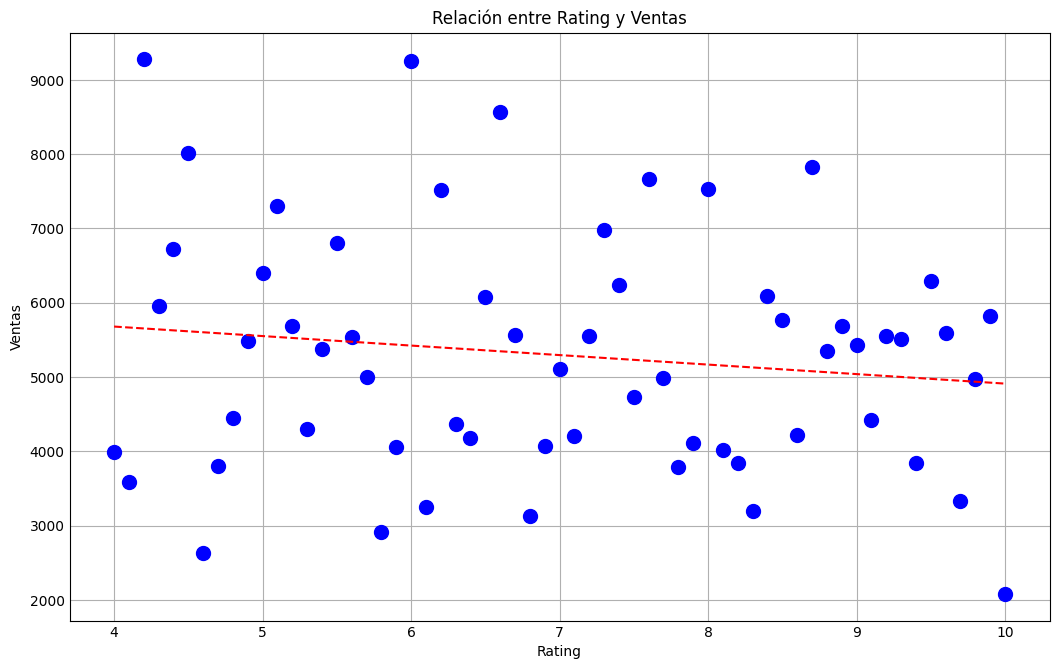

In [312]:
plt.figure(figsize=(10, 6))
plt.scatter(rating_total_spent['rating'], rating_total_spent['Total'], color='blue', s=100)

# Añadir títulos y etiquetas
plt.title('Relación entre Rating y Ventas')
plt.xlabel('Rating')
plt.ylabel('Ventas')

# Calcular la línea de tendencia
z = np.polyfit(rating_total_spent['rating'], rating_total_spent['Total'], 1)
p = np.poly1d(z)

# Dibujar la línea de tendencia
plt.plot(rating_total_spent['rating'], p(rating_total_spent['rating']), "r--")

# Mostrar el gráfico
plt.grid(True)
plt.show()

Lo que deberia ser una relacion directamente proporcional es lo contrario donde un menor raiting es una mayor venta puede de verse a muchos factores como por ejemplo la atención, precios de los productos entre otros 

# 6. ¿Cuál es la tendencia de ingresos a lo largo del tiempo?

In [313]:
# Se agrupa por mes y sumar los ingresos
monthly_income = df_supermarket_sales.groupby(df_supermarket_sales['date'].dt.to_period('M'))['5%_of_gross_income'].sum()

In [314]:
monthly_income = pd.DataFrame(monthly_income)
monthly_income

,5%_of_gross_income
date,
2019-01,5537.708
2019-02,4629.494
2019-03,5212.167


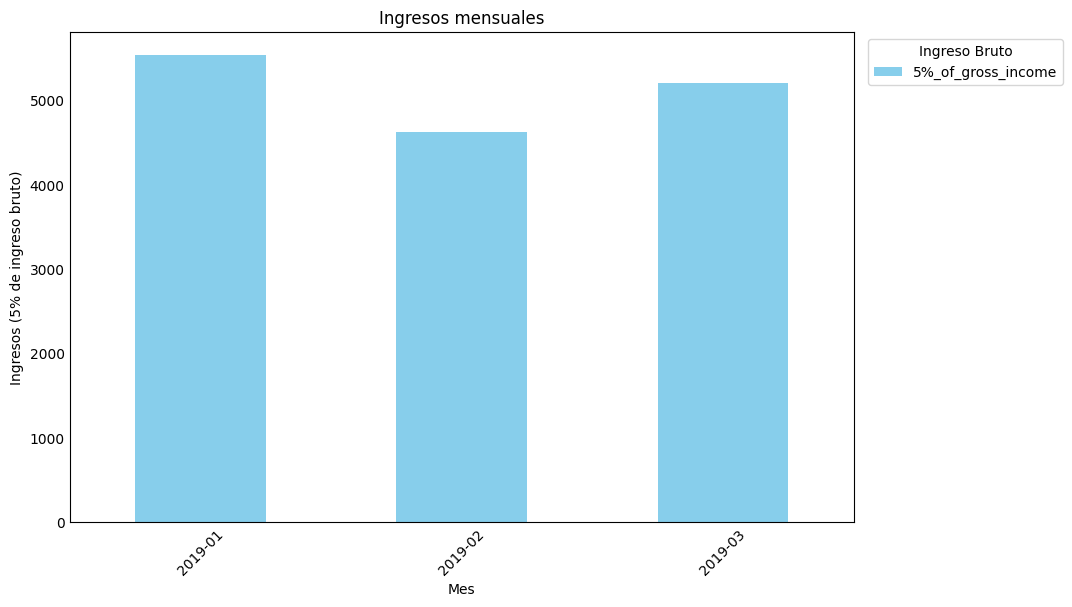

In [315]:
# Crear el gráfico de barras

monthly_income.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Ingresos mensuales')
plt.xlabel('Mes')
plt.ylabel('Ingresos (5% de ingreso bruto)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización
plt.legend(title='Ingreso Bruto', bbox_to_anchor=(1.01, 1), loc='upper left')

plt.show()



# Machine Learning

## 1. Predicción de ventas futuras:

Sí, es posible utilizar técnicas de regresión para predecir las ventas futuras del supermercado. Se pueden utilizar características como la ciudad, el tipo de cliente, el género del cliente, el tipo de producto, etc., como variables predictoras para entrenar el modelo de regresión.

In [316]:
df_supermarket_sales2 = df_supermarket_sales.copy()

In [317]:
df_supermarket_sales2.head(5)

,invoice_id,branch,city,customer_type,gender_customer,product_line,unit_cost,quantity,cogs,5%_of_gross_income,Total,date,time,payment_method,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83,26.1415,548.9715,2019-01-05,13:08,Ewallet,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40,3.8200,80.2200,2019-03-08,10:29,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31,16.2155,340.5255,2019-03-03,13:23,Credit card,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76,23.2880,489.0480,2019-01-27,20:33,Ewallet,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17,30.2085,634.3785,2019-02-08,10:37,Ewallet,5.3


In [318]:
for column in df_supermarket_sales2.columns:
    unique_count = df_supermarket_sales2[column].nunique()
    duplicates_count = df_supermarket_sales2[column].duplicated().sum()
    null_count = df_supermarket_sales2[column].isnull().sum()
    print(f"Columna {column}: {unique_count} datos unicos, {duplicates_count} datos duplicados, {null_count} datos nulos") 
    print('=='*50)

Columna invoice_id: 1000 datos unicos, 0 datos duplicados, 0 datos nulos
Columna branch: 3 datos unicos, 997 datos duplicados, 0 datos nulos
Columna city: 3 datos unicos, 997 datos duplicados, 0 datos nulos
Columna customer_type: 2 datos unicos, 998 datos duplicados, 0 datos nulos
Columna gender_customer: 2 datos unicos, 998 datos duplicados, 0 datos nulos
Columna product_line: 6 datos unicos, 994 datos duplicados, 0 datos nulos
Columna unit_cost: 943 datos unicos, 57 datos duplicados, 0 datos nulos
Columna quantity: 10 datos unicos, 990 datos duplicados, 0 datos nulos
Columna cogs: 990 datos unicos, 10 datos duplicados, 0 datos nulos
Columna 5%_of_gross_income: 990 datos unicos, 10 datos duplicados, 0 datos nulos
Columna Total: 990 datos unicos, 10 datos duplicados, 0 datos nulos
Columna date: 89 datos unicos, 911 datos duplicados, 0 datos nulos
Columna time: 506 datos unicos, 494 datos duplicados, 0 datos nulos
Columna payment_method: 3 datos unicos, 997 datos duplicados, 0 datos nul

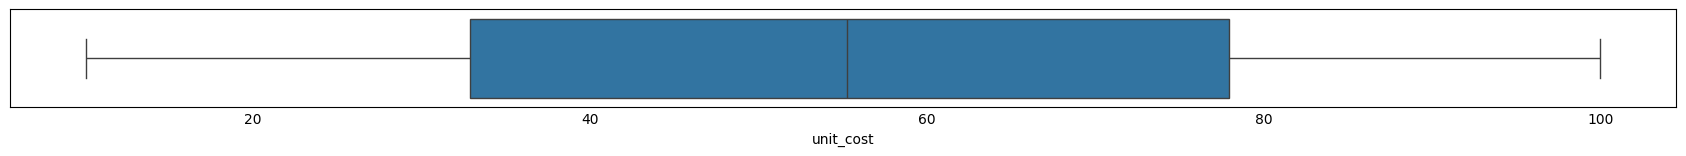

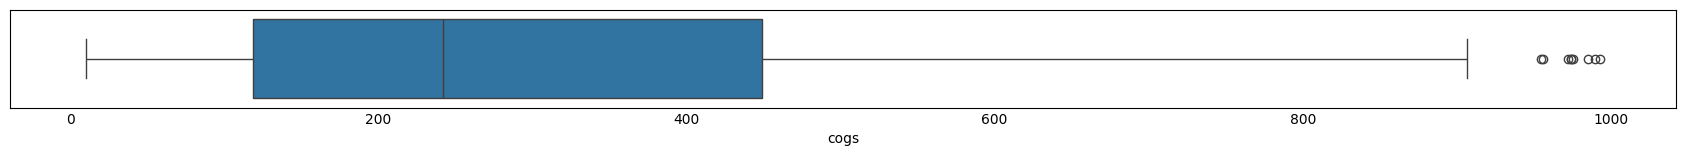

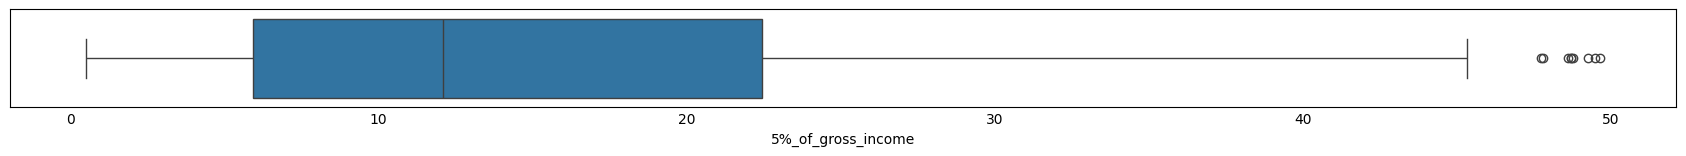

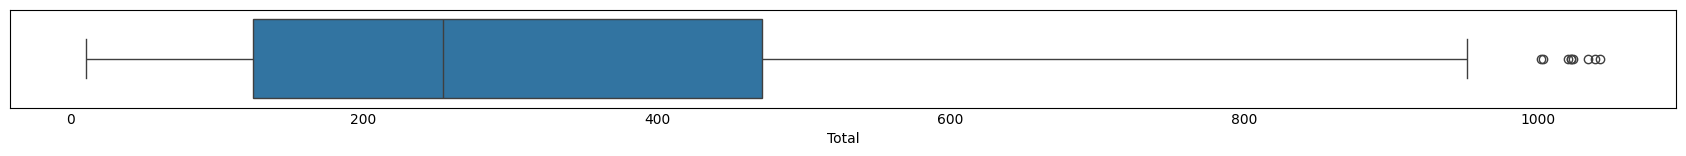

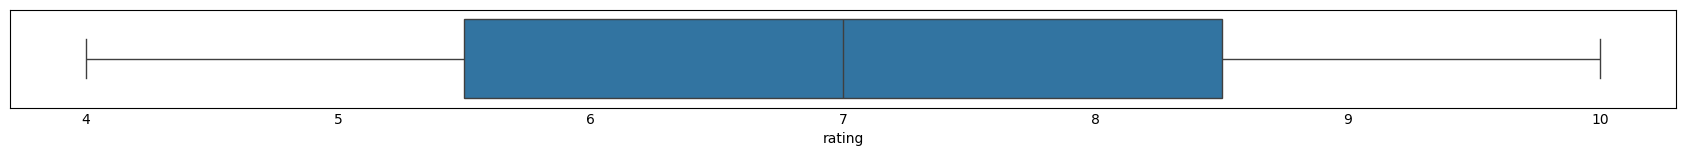

In [319]:
num_cols = df_supermarket_sales2.select_dtypes(include='float').columns

for col in num_cols:
    plt.figure(figsize =(17,1))
    sns.boxplot(data=df_supermarket_sales2[num_cols], x=col)

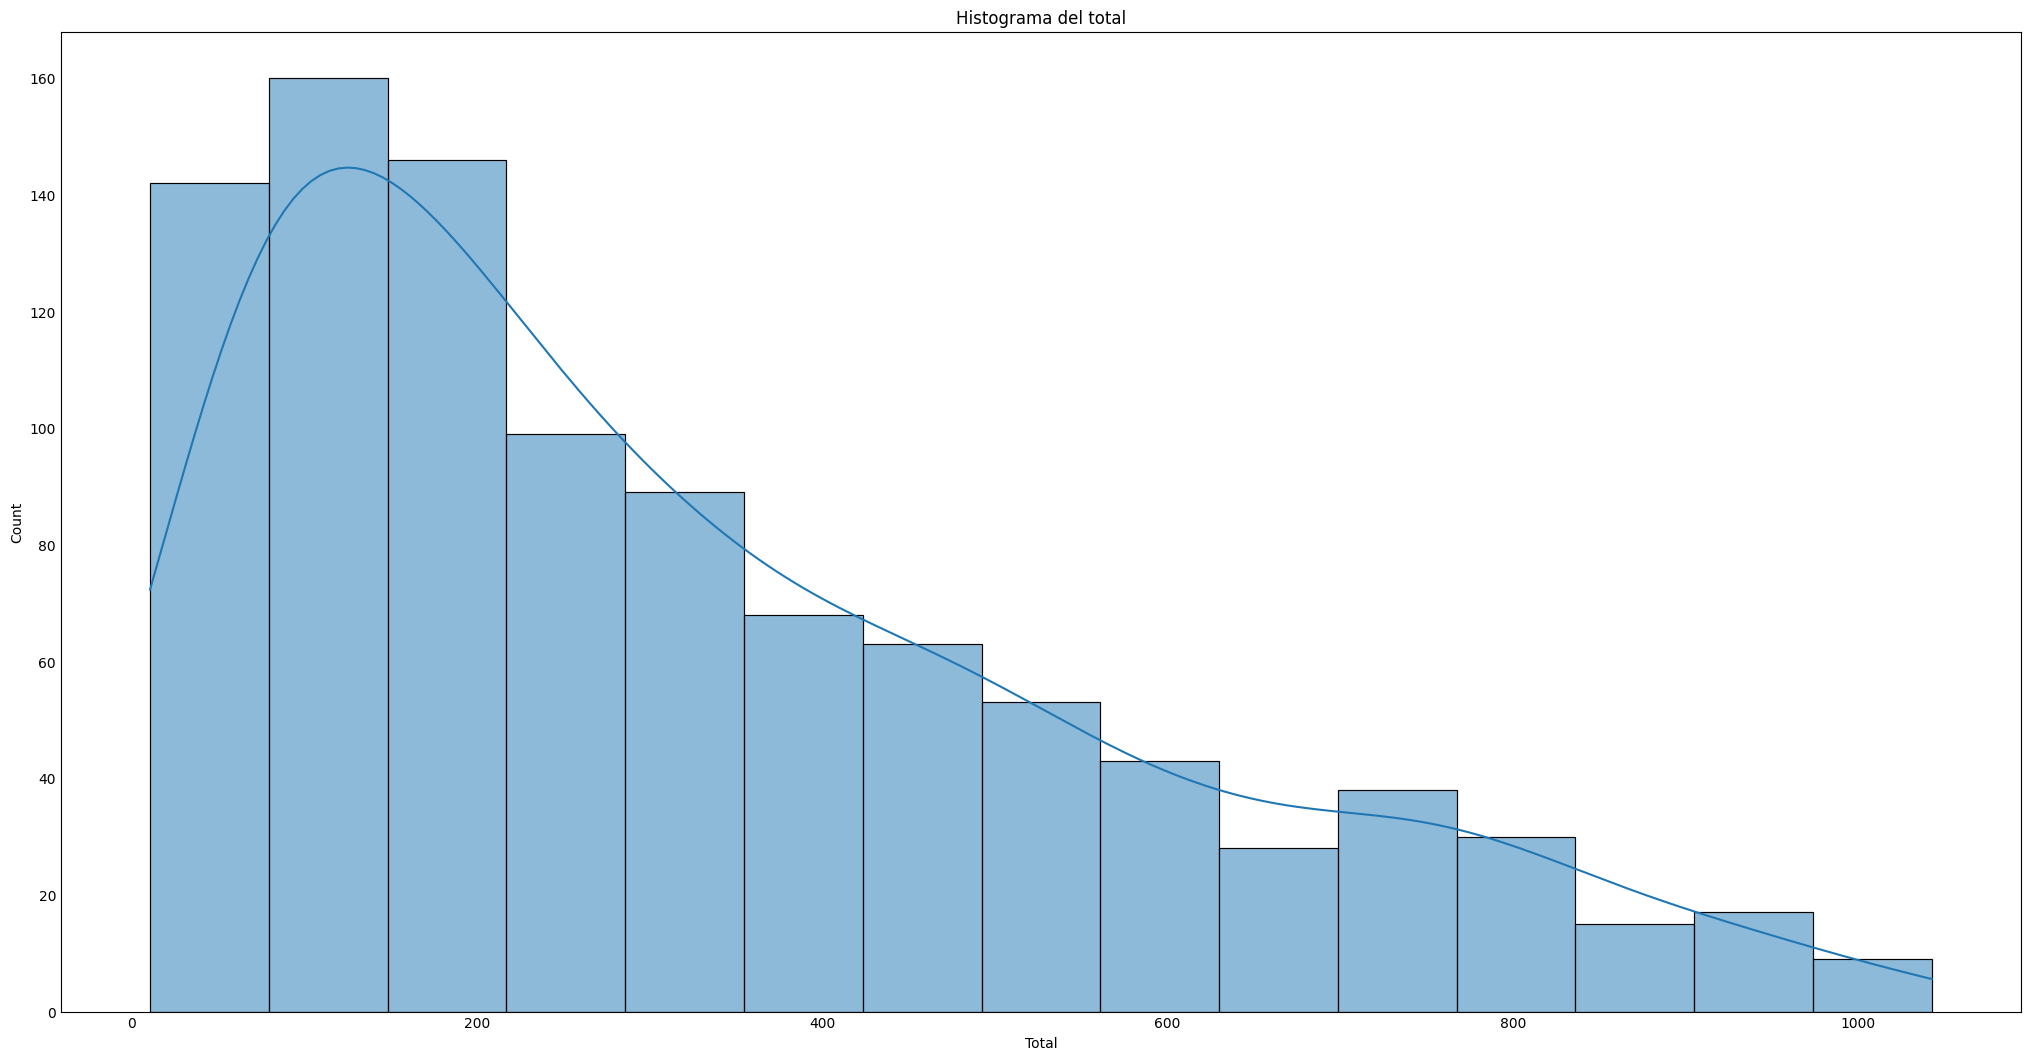

In [320]:
ax = sns.histplot(data=df_supermarket_sales2, x='Total', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma del total')
ax.set_xlabel('Total')

plt.show()

In [321]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

def normalize_features(df_sms):
    # Copy the original DataFrame to avoid modifying the input
    normalized_df = df_sms.copy()
    # Numerical columns to be normalized
    numerical_cols = ['unit_cost', 'cogs', '5%_of_gross_income', 'Total', 'rating']
    # Categorical columns to be encoded
    categorical_cols = [col for col in df_sms.columns if col not in numerical_cols]
    # Normalize numerical features using Min-Max Scaling
    scaler_dict = {}
    for col in numerical_cols:
        scaler = MinMaxScaler()
        normalized_df[col] = scaler.fit_transform(df_sms[[col]])
        scaler_dict[col] = scaler
    # Encode categorical features using Label Encoding
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        normalized_df[col] = le.fit_transform(df_sms[col])
        label_encoders[col] = le
    # Encode the target column
    target_col = 'Total'
    if target_col in df_sms.columns:
        if target_col in label_encoders:
            normalized_df[target_col] = label_encoders[target_col].transform(df_sms[target_col])
        else:
            le = LabelEncoder()
            normalized_df[target_col] = le.fit_transform(df_sms[target_col])
            label_encoders[target_col] = le
    return normalized_df, scaler_dict, label_encoders

In [322]:
normalized_df, scaler_dict, label_encoders = normalize_features(df_supermarket_sales2)

In [323]:
normalized_df

,invoice_id,branch,city,customer_type,gender_customer,product_line,unit_cost,quantity,cogs,5%_of_gross_income,Total,date,time,payment_method,rating
0,814,0,2,0,0,3,0.718847,6,0.521616,0.521616,804,4,146,2,0.850000
1,142,2,1,1,0,0,0.057855,4,0.067387,0.067387,144,66,23,0,0.933333
2,653,0,2,1,1,4,0.403316,6,0.319628,0.319628,609,61,155,1,0.566667
3,18,0,2,0,1,3,0.535603,7,0.463549,0.463549,756,26,485,2,0.733333
4,339,0,2,1,1,5,0.848131,6,0.604377,0.604377,857,38,29,2,0.216667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,153,2,1,1,1,3,0.336782,0,0.030707,0.030707,54,28,174,2,0.366667
996,250,1,0,1,0,4,0.971295,9,0.980465,0.980465,985,60,342,2,0.066667
997,767,0,2,0,1,2,0.242101,0,0.022049,0.022049,37,39,154,0,0.616667
998,308,0,2,1,1,4,0.620160,0,0.056622,0.056622,103,52,261,0,0.016667


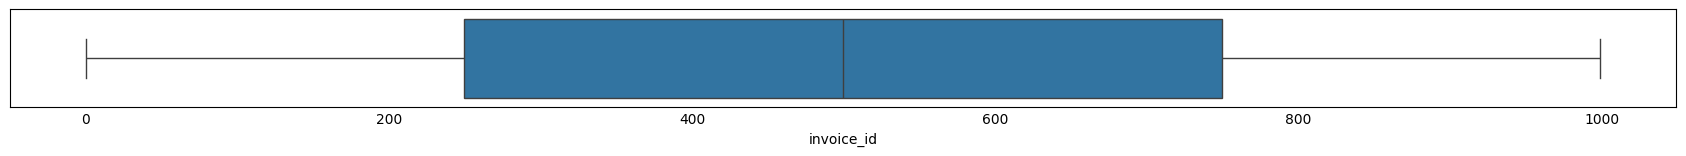

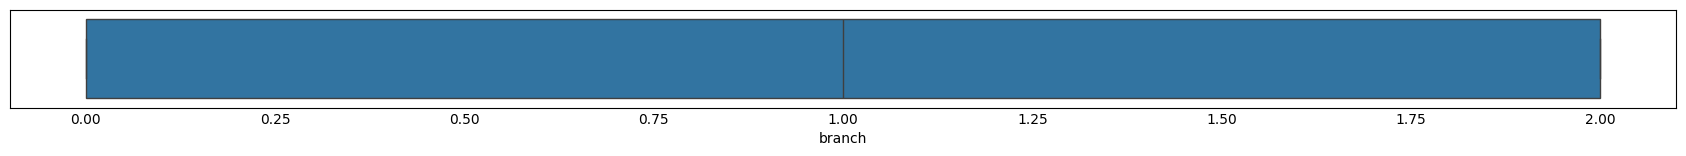

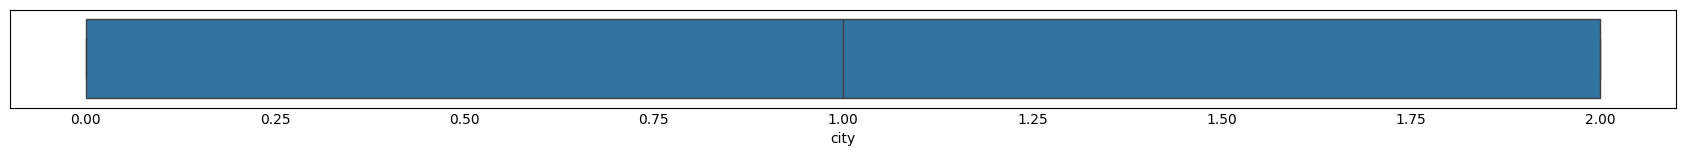

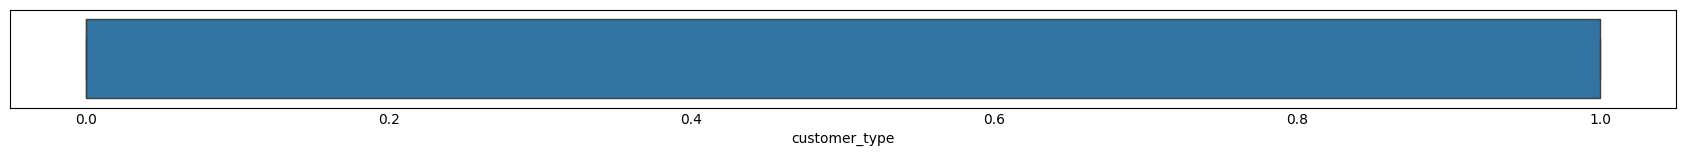

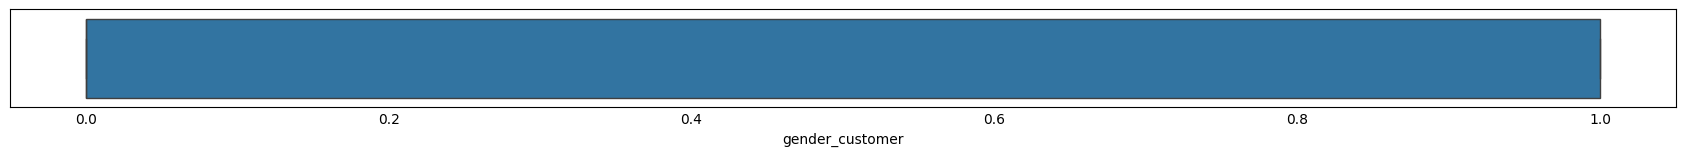

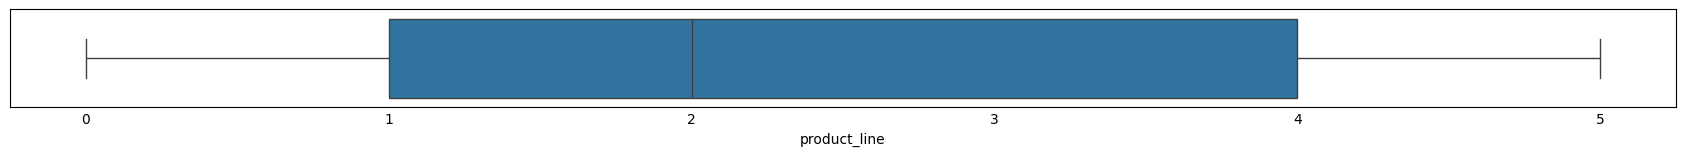

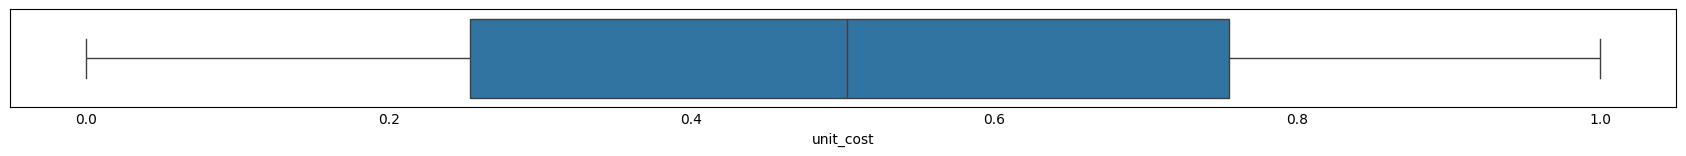

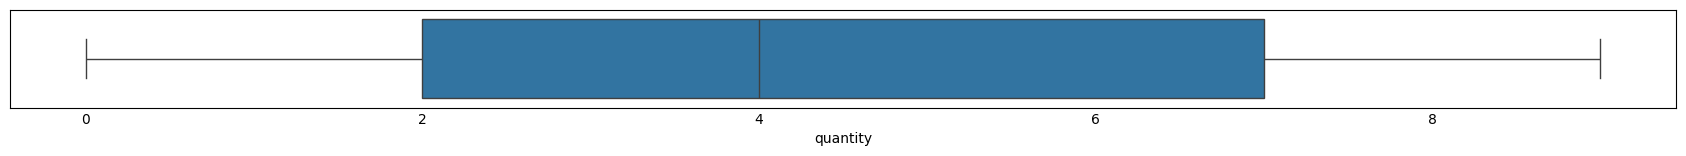

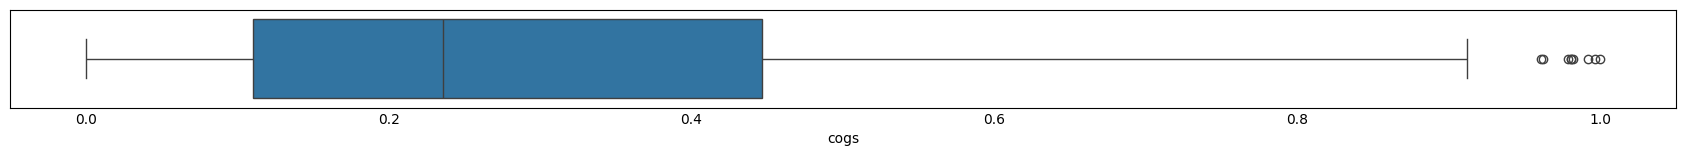

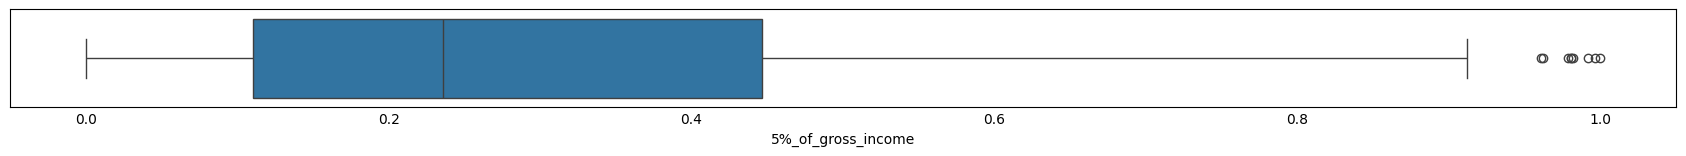

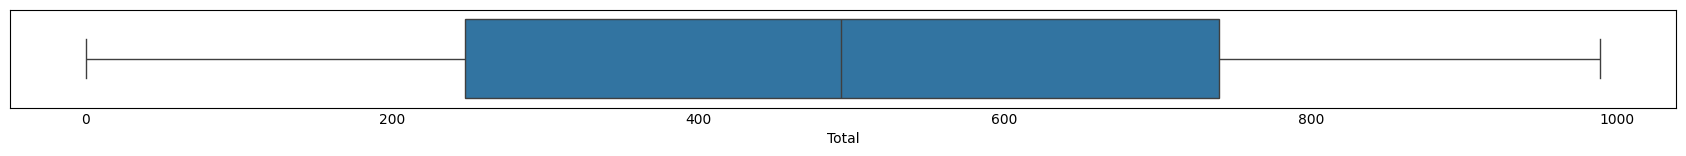

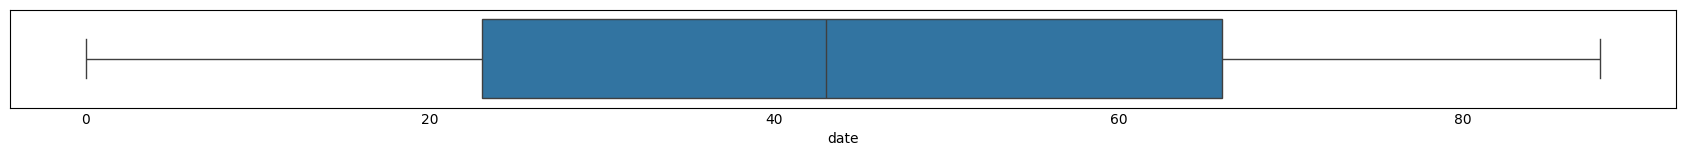

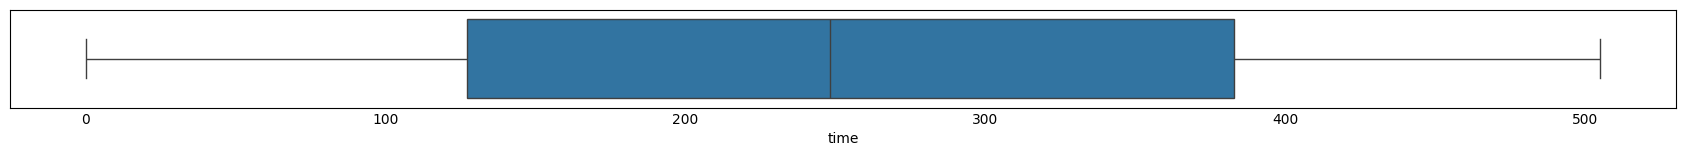

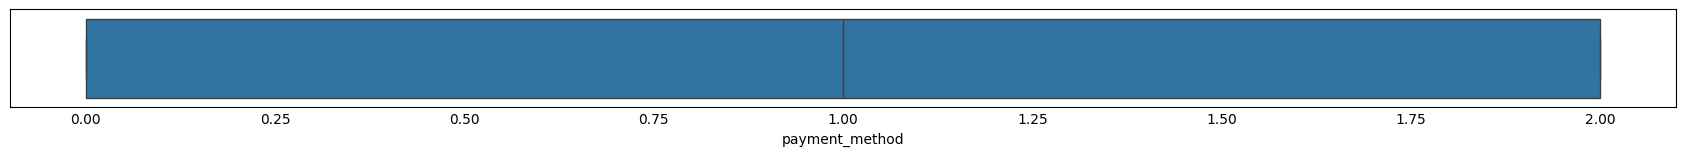

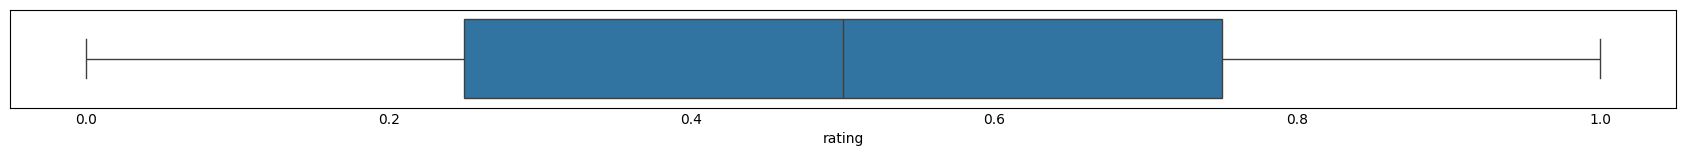

In [324]:
num_cols = normalized_df.columns

for col in num_cols:
    plt.figure(figsize =(17,1))
    sns.boxplot(data=normalized_df[num_cols], x=col)

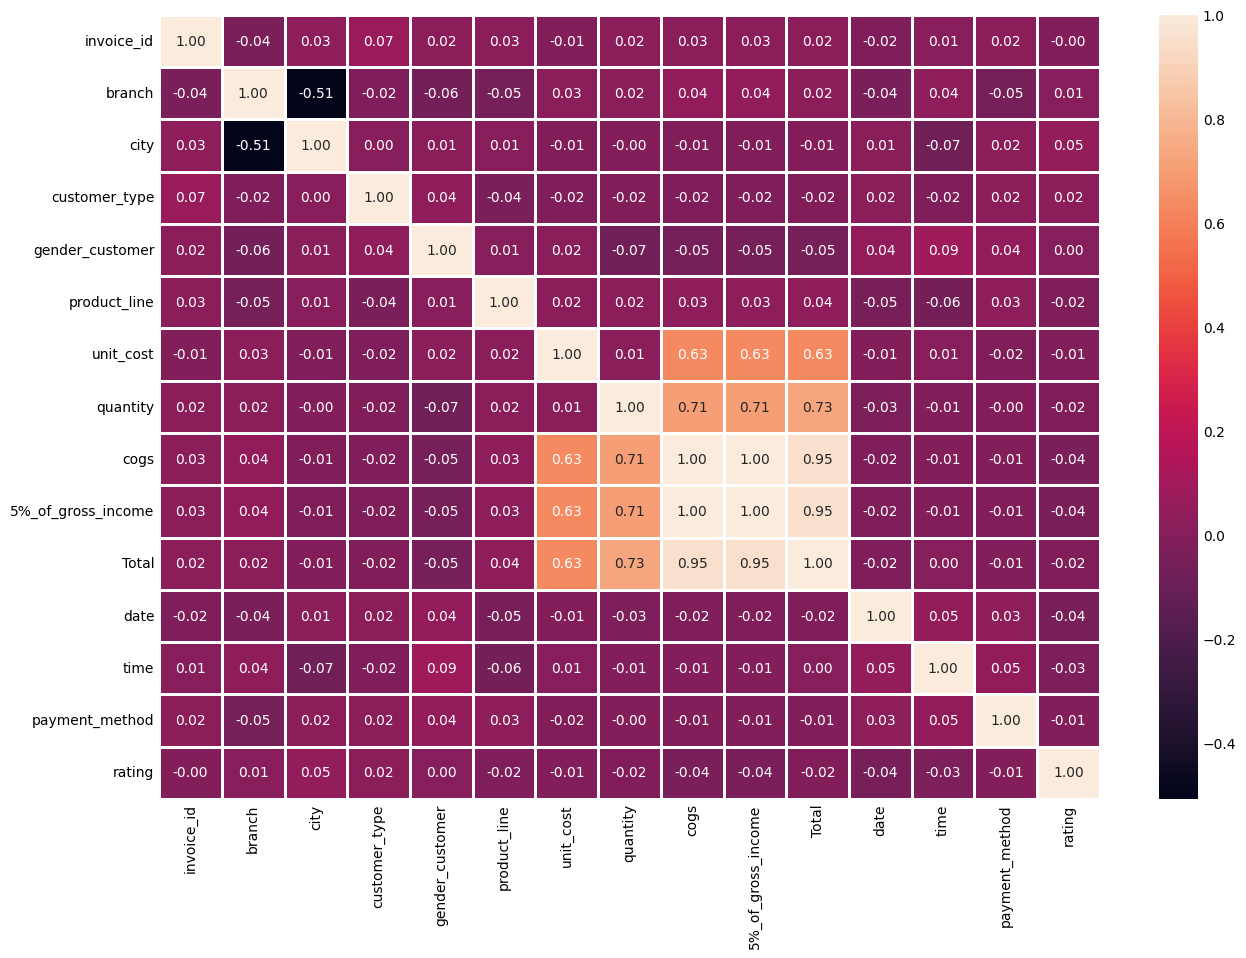

In [325]:
# ahora observemos su correlaccion 
corr = normalized_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", linewidth=.8)
plt.show()

**cogs (Cost of Goods Sold):** Tiene una correlación muy alta con Total (0.95), lo cual es esperable ya que el costo de bienes vendidos suele estar directamente relacionado con las ventas totales.

**quantity:** También muestra una alta correlación con Total (0.73), lo cual tiene sentido porque la cantidad de productos vendidos influye directamente en las ventas totales.

**unit_cost:** Presenta una correlación moderada (0.63) con Total, indicando que el costo unitario del producto también tiene un impacto significativo en las ventas totales.

Variables como **invoice_id, branch, city, customer_type, gender_customer, product_line, date, time, payment_method y rating** muestran correlaciones muy bajas con Total. Esto indica que estas variables pueden no son buenos predictores de las ventas totales por sí mismas.

In [326]:
normalized_df.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender_customer',
       'product_line', 'unit_cost', 'quantity', 'cogs', '5%_of_gross_income',
       'Total', 'date', 'time', 'payment_method', 'rating'],
      dtype='object')

In [327]:
# Se toma una muestra del 50% de la poblacion df el cual no tiene outliers
df_muestra = normalized_df.sample(frac=0.5,random_state=1,ignore_index=True)

# Se eliminan las variables que consideramos que no son utiles para el modelo predictivo 
df_muestra.drop(['invoice_id', 'customer_type'],axis=1,inplace=True)

In [328]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LinearRegression

# antes de realizar la división de los datos creare otra copia para no afectar lo ya realizado o si se deba
# modificar algo anteriormente. 
df_rl = df_muestra.copy()
### Division de los Datos
#variables independientes
X = df_rl.drop(['Total'], axis=1)

#variable dependiente
y = df_rl['Total']
#división en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
#Inicializando el modelo
lr = LinearRegression()
#Entrenamiento
lr.fit(X_train, y_train)
#Prueba
predictions_train = lr.predict(X_train) 
predictions_test = lr.predict(X_test)
#Resultados de la predicción
predictions_train
predictions_test
print(predictions_train.shape)
print(predictions_test.shape)

(300,)
(200,)


In [329]:
#importar las bibliotecas
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error
# Lista de métricas
metricas = [
    ('Coeficiente de Determinación (R^2)', r2_score),
    ('Error Absoluto Medio (MAE)', mean_absolute_error),
    ('Error medio cuadrado (MSE)', mean_squared_error),
    ('Raíz cuadrada del error cuadrático medio (RMSE)', root_mean_squared_error),
    ('Error porcentual absoluto medio (MAPE)', mean_absolute_percentage_error),
    ('Median absolute error (MedAE)', median_absolute_error),
    ('Error Maximo (Max Error)', max_error)
]

# Cálculos de las métricas de evaluación del modelo en un bucle for
for nombre_metrica, metrica_funcion in metricas:
    print(nombre_metrica + ':')
    print('  Entrenamiento:', metrica_funcion(y_train, predictions_train))
    print('  Prueba:', metrica_funcion(y_test, predictions_test))
    print('='*80)


Coeficiente de Determinación (R^2):
  Entrenamiento: 0.9461818790354383
  Prueba: 0.9365507935503983
Error Absoluto Medio (MAE):
  Entrenamiento: 54.568542351053544
  Prueba: 54.60696697731538
Error medio cuadrado (MSE):
  Entrenamiento: 4523.343851586044
  Prueba: 4594.962065268683
Raíz cuadrada del error cuadrático medio (RMSE):
  Entrenamiento: 67.2558090545794
  Prueba: 67.78614950908985
Error porcentual absoluto medio (MAPE):
  Entrenamiento: 849544776721422.8
  Prueba: 0.36643447909601334
Median absolute error (MedAE):
  Entrenamiento: 49.366950441016826
  Prueba: 47.24897789026849
Error Maximo (Max Error):
  Entrenamiento: 181.01626139024097
  Prueba: 216.11472363474525


In [330]:
# corrección del calculo de MAPE para el entrenamiento

# Imputación con el promedio de valores no ceros
non_zero_mean = np.mean(y_train[y_train != 0])
y_train_imputed = np.where(y_train == 0, non_zero_mean, y_train)

# Cálculo del MAPE con valores imputados
mape = np.mean(np.abs((y_train_imputed - predictions_train) / y_train_imputed))
print(f'MAPE para el entrenamiento: {mape}')


MAPE para el entrenamiento: 0.3085416081204139


Las métricas muestran que el modelo de regresión tiene un buen desempeño tanto en el conjunto de entrenamiento como en el de prueba. El modelo es capaz de explicar la mayor parte de la variabilidad en las ventas (alto R²), tiene errores promedio relativamente bajos (MAE y RMSE bajos), y aunque hay algunos casos con errores grandes (Max Error), en su mayoría, las predicciones son precisas y consistentes. Sin embargo, el MAPE indica que hay un margen de mejora en términos de precisión porcentual. Esto sugiere que el modelo puede ser refinado o que puede haber factores no capturados por las variables actuales que influyen en las ventas.

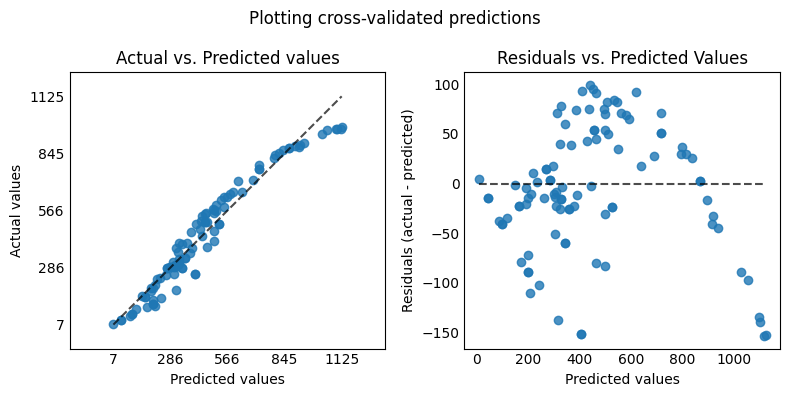

In [331]:
from sklearn.metrics import PredictionErrorDisplay
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(lr, X, y, cv=5)
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

### Gráfico de Valores Reales vs. Predichos (Actual vs. Predicted Values)

En el gráfico de la izquierda:

- **Eje X**: Valores predichos por el modelo.
- **Eje Y**: Valores reales.
- **Línea Discontinua**: Representa la línea ideal donde los valores predichos son exactamente iguales a los valores reales.

#### Interpretación:
- La mayoría de los puntos se alinean bien a lo largo de la línea discontinua, lo que indica que el modelo predice bastante bien los valores reales.
- Los puntos que se desvían de la línea indican errores de predicción. Cuanto más cerca están los puntos de la línea, mejor es el rendimiento del modelo.
- En general, una alineación cercana a la línea indica que el modelo tiene una buena capacidad predictiva.

### Gráfico de Residuales vs. Valores Predichos (Residuals vs. Predicted Values)
En el gráfico de la derecha:
- **Eje X**: Valores predichos por el modelo.
- **Eje Y**: Residuales (errores de predicción), calculados como la diferencia entre los valores reales y los predichos (actual - predicted).
- **Línea Discontinua Horizontal**: Representa un error residual de cero, donde las predicciones son exactamente correctas.

#### Interpretación:
- Los residuales están dispersos alrededor de la línea horizontal de cero, lo que es un buen indicativo de que no hay un patrón obvio en los errores. Esto sugiere que el modelo no está sistemáticamente subestimando ni sobreestimando en ninguna parte del rango de predicciones.
- Sin embargo, se observa una mayor dispersión de los residuales para valores predichos más altos, lo que puede indicar que el modelo tiene más dificultades para predecir correctamente los valores más altos.
- La ausencia de un patrón claro en la dispersión de los residuales sugiere que los supuestos de linealidad y homocedasticidad (varianza constante de los errores) se cumplen razonablemente bien.

### Conclusión General:
- **Gráfico de Valores Reales vs. Predichos**: Indica que el modelo tiene un buen rendimiento general con las predicciones alineadas cerca de la línea ideal.
- **Gráfico de Residuales vs. Valores Predichos**: Muestra que los errores no presentan un patrón claro, lo que es bueno. Sin embargo, la mayor dispersión para valores más altos de predicciones podría indicar una mayor incertidumbre o variabilidad en esas predicciones.

En resumen, ambos gráficos sugieren que el modelo de regresión está funcionando bien en general, aunque podría haber margen de mejora en las predicciones de los valores más altos. Esto podría implicar la necesidad de ajustar el modelo o considerar técnicas adicionales para manejar mejor estas predicciones.